# Diplomado ML & DS 
# Sesión 5: Random Forests y exploración aleatorizada

# Taller

Este taller se va a enfocar en trabajar con el conjunto de datos del censo de 1993 de USA. El conjunto de datos reune una serie de características socioeconómicas tanto categóricas como numéricas. El objetivo es construir un clasificador que determine si la persona tiene una ganancia alta al año (más de 50K USD) o baja (menos de 50K USD al año). A continuación encuentra una descripción de las características:

Etiqueta:
* income: >50K, <=50K.
Características:
* age: Variable continua.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: Variable continua.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: Variable continua.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Variable continua.
* capital-loss: Variable continua.
* hours-per-week: Variable continua.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


## Carga de datos
* Cargue el conjunto de datos `adult.csv` en Pandas.
* Este conjunto de datos tiene dos problemas:
    * Contiene datos faltantes, representados por un interrogante: "?"
    * Es un conjunto de datos imbalanceado.
* Para verificar ambos hechos:
    * Verifique qué porcentaje de valores indefinidos hay para las variables `workclass`, `occupation` y `native-country`.
    * Luego, puede limpiar aquellas filas que contengan datos indefinidos. Puede usar el siguiente código:
    ```python
    df = df[df["workclass"] != "?"]
    df = df[df["occupation"] != "?"]
    df = df[df["native-country"] != "?"]
    ```
    * Verifique el DataFrame tenga un tamaño de 45222 elementos por 15 características.
    * Verifique la distribución de etiquetas en la columna `income`, ¿Cuál clase tiene mayor número de ejemplos?
* Use `.describe()` para obtener un análisis de las variables numéricas del conjunto de datos.
* Realice un conteo de cada elemento de las variables categóricas:
    * ['workclass', 'race', 'education','marital-status', 'occupation','relationship', 'gender', 'native-country', 'income'] 
* Simplifique la categoría 'marital-status' de la siguiente forma:
    * 'Divorced' -> 'not married'
    * 'Married-AF-spouse' -> 'married'
    * 'Married-civ-spouse' -> 'married'
    * 'Married-spouse-absent' -> 'married'
    * 'Never-married' -> 'not married'
    * 'Separated' -> 'not married'
    * 'Widowed' -> 'not married'
* Convierta las variables categóricas a numéricas. El enfoque aquí presentado no es el mejor, pero será una primera aproximación. Puede usar el siguiente código:
```python
for col in category_col:
    b, c = np.unique(df[col], return_inverse=True) 
    df[col] = c
```
A pesar de que no queremos inducir un orden en las categorías analizadas, es un buen inicio para probar Validación cruzada.
* Cree una matriz `X` de características usando:
    * ['age','workclass','education','educational-num','marital-status', 'occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week', 'native-country']
* Cree el arreglo `y` usando la columna `income`:
* Genere una partición de entrenamiento y prueba $80\%-20\%$ estratificada. NO MODIFIQUE EL CONJUNTO DE DATOS ORIGINAL.
* Verifique que en efecto la partición haya sido estratificada.

## RandomizedSearchCV

* Genere la siguiente distribución de parámetros:
    * `n_estimators` seguirá una distribución uniforme discreta entre 4 y 512
    * `max_features` seguirá una distribución uniforme entre 0 y 1
    * `max_depth` será un valor entre 5 o None
    * `bootstrap` será un valor entre True o False
* ¿Qué hace `max_depth` y `bootstrap`? ¿Qué significa que `max_depth` sea None? Consulte la [documentación](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* Entrene un RandomForestClassifier sobre las siguientes condiciones:
    * 20 iteraciones de la distribución de parámetros
    * Pliegues de la validación cruzada= 5
    * Use `n_jobs=-1` para hacer la búsqueda de parámetros de forma paralela
* ¿Cuales son las mejores configuraciones?
* ¿Qué desempeño tienen las mejores configuraciones?
* Reporte accuracy, precision, recall y matriz de confusión en el conjunto de prueba

In [0]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("adult.csv")
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
print("Porcentaje faltante: {} %".format((sum(df["workclass"]=="?")/df["workclass"].count())*100))

Porcentaje faltante: 5.7307235575938735 %


In [9]:
print("Porcentaje faltante: {} %".format((sum(df["occupation"]=="?")/df["occupation"].count())*100))

Porcentaje faltante: 5.751197739650301 %


In [10]:
print("Porcentaje faltante: {} %".format((sum(df["native-country"]=="?")/df["native-country"].count())*100))

Porcentaje faltante: 1.7546374022357807 %


In [0]:
df = df[df["workclass"] != "?"]
df = df[df["occupation"] != "?"]
df = df[df["native-country"] != "?"]

In [12]:
df.shape

(45222, 15)

In [13]:
df["income"].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [14]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
for col in ['workclass', 'race', 'education','marital-status', 
            'occupation','relationship', 'gender', 'native-country', 'income']:
  print("Para la columna {} la distribución es:\n {}".format(col, df[col].value_counts()))

Para la columna workclass la distribución es:
 Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
Para la columna race la distribución es:
 White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64
Para la columna education la distribución es:
 HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
Para la columna marital-status la distribución es:
 Married-civ-spouse       21055
Never-married         

In [0]:
def married_or_not_married(marital_status):
  if marital_status in ['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent']:
    return 'married'
  else:
    return 'not married'

In [18]:
married_or_not_married(df["marital-status"][0])

'not married'

In [19]:
df["marital-status"][0]

'Never-married'

In [0]:
df["marital-status"] = df["marital-status"].apply(married_or_not_married)

In [21]:
df["marital-status"].value_counts()

not married    23583
married        21639
Name: marital-status, dtype: int64

In [0]:
category_col = ['workclass', 'race', 'education','marital-status', 
            'occupation','relationship', 'gender', 'native-country', 'income']
for col in category_col:
  b, c = np.unique(df[col], return_inverse=True) 
  df[col] = c

In [23]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,1,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,0,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,0,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,0,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,1,7,1,4,1,0,0,30,38,0


In [0]:
features_col_list = ['age','workclass','education','educational-num','marital-status', 
                     'occupation','relationship','race','gender','capital-gain',
                     'capital-loss','hours-per-week', 'native-country']
X = df[features_col_list].values

In [25]:
X.shape

(45222, 13)

In [0]:
y = df["income"].values

In [0]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, 
                                                    random_state=12)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36177, 13)
(9045, 13)
(36177,)
(9045,)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

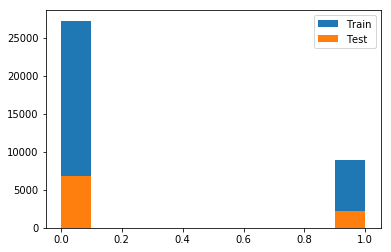

In [33]:
plt.hist(y_train, label="Train")
plt.hist(y_test, label="Test")
plt.legend()
plt.show()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform 
from scipy.stats import randint

In [0]:
param_dist={"n_estimators": randint(4, 512),
           "max_features": uniform(),
           "max_depth": [5, None],
            "bootstrap": [True, False]}

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier()

In [0]:
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, 
                                   n_jobs=-1, verbose=2)

In [48]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 14.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [0]:
clf_op = random_search.best_estimator_

In [50]:
clf_op.score(X_test, y_test)

0.8449972360420122

In [0]:
y_pred = clf_op.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6803
           1       0.78      0.52      0.63      2242

    accuracy                           0.84      9045
   macro avg       0.82      0.74      0.76      9045
weighted avg       0.84      0.84      0.83      9045

